<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/ml_additional_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
dataset = pd.read_csv("survey_results_public.csv")

In [15]:
dataset.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [16]:
def convert_years(value):
    try:
      value = int(value)
      return value
    except:

      if "Less than 1 year" in value:
          return 0
      elif "More" in value:
          return 50


In [17]:
def convert_age(value):
    if value == "Under 18 years old":
        return 0
    elif value == "65 years or older":
        return 65
    elif value == "Prefer not to say":
      return np.nan
    else:
        return int(value.split("-")[0])


In [30]:
dataset = dataset[(dataset.ConvertedCompYearly <= 250000) & (dataset.ConvertedCompYearly >0)]


In [61]:
dataset_for_prediction = dataset[["Employment",
                                  "EdLevel",
                                  "WorkExp",
                                  "YearsCodePro",
                                  "LanguageHaveWorkedWith",
                                  "ConvertedCompYearly",
                                  "DevType",
                                  "Country",
                                  "RemoteWork",
                                  "Age",
                                  "OrgSize",
                                  "Currency"]]
dataset_for_prediction = dataset_for_prediction.dropna()

In [62]:
dataset_for_prediction["WorkExp"] = dataset_for_prediction["WorkExp"].apply(convert_years)
dataset_for_prediction["YearsCodePro"] = dataset_for_prediction["YearsCodePro"].apply(convert_years)
dataset_for_prediction["Age"] = dataset_for_prediction["Age"].apply(convert_age)

In [63]:
dataset_for_prediction = dataset_for_prediction.dropna()

In [64]:
all_lang_types = set()
dataset_for_prediction["LanguageHaveWorkedWith"].str.split(";").apply(all_lang_types.update)

,LanguageHaveWorkedWith
2,None
3,None
4,None
5,None
6,None
...,...
89162,None
89166,None
89167,None
89170,None


In [65]:
dataset_for_prediction.head()

,Employment,EdLevel,WorkExp,YearsCodePro,LanguageHaveWorkedWith,ConvertedCompYearly,DevType,Country,RemoteWork,Age,OrgSize,Currency
2,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,23,Bash/Shell (all shells);Go,250000.0,"Developer, back-end",United States of America,"Hybrid (some remote, some in-person)",45.0,"5,000 to 9,999 employees",USD\tUnited States dollar
3,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,7,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,156000.0,"Developer, front-end",United States of America,"Hybrid (some remote, some in-person)",25.0,100 to 499 employees,USD\tUnited States dollar
4,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,HTML/CSS;JavaScript;TypeScript,23456.0,"Developer, full-stack",Philippines,Remote,25.0,20 to 99 employees,PHP\tPhilippine peso
5,"Employed, full-time",Some college/university study without earning ...,22,21,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,96828.0,"Developer, back-end",United Kingdom of Great Britain and Northern I...,Remote,35.0,100 to 499 employees,GBP\tPound sterling
6,"Employed, full-time",Some college/university study without earning ...,4,3,Ada;Clojure;Elixir;Go;HTML/CSS;Java;JavaScript...,135000.0,"Developer, full-stack",United States of America,Remote,35.0,"1,000 to 4,999 employees",USD\tUnited States dollar


In [ ]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
# encoder = LabelEncoder()
# dataset_for_prediction['Student'] = encoder.fit_transform(dataset_for_prediction['Student'])
# dataset_for_prediction['Employment'] = encoder.fit_transform(dataset_for_prediction['Employment'])
# dataset_for_prediction['FormalEducation'] = encoder.fit_transform(dataset_for_prediction['FormalEducation'])
#


In [66]:
all_dev_types = set()
dataset_for_prediction["DevType"].str.split(";").apply(all_dev_types.update)

,DevType
2,None
3,None
4,None
5,None
6,None
...,...
89162,None
89166,None
89167,None
89170,None


In [67]:
for lang in all_lang_types:
    dataset_for_prediction[f"LanguageHaveWorkedWith{lang}"] = dataset_for_prediction["LanguageHaveWorkedWith"].apply(lambda x: 1 if lang in x else 0)
dataset_for_prediction.drop(columns=["LanguageHaveWorkedWith"], inplace=True)

In [68]:
for dev in all_dev_types:
    dataset_for_prediction[f"DevType_{dev}"] = dataset_for_prediction["DevType"].apply(lambda x: 1 if dev in x else 0)
dataset_for_prediction.drop(columns=["DevType"], inplace=True)

In [69]:
dataset_for_prediction

,Employment,EdLevel,WorkExp,YearsCodePro,ConvertedCompYearly,Country,RemoteWork,Age,OrgSize,Currency,...,"DevType_Senior Executive (C-Suite, VP, etc.)","DevType_Developer, game or graphics",DevType_Database administrator,DevType_Academic researcher,DevType_Security professional,DevType_Cloud infrastructure engineer,DevType_Marketing or sales professional,DevType_Other (please specify):,DevType_Educator,DevType_Developer Experience
2,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23,23,250000.0,United States of America,"Hybrid (some remote, some in-person)",45.0,"5,000 to 9,999 employees",USD\tUnited States dollar,...,0,0,0,0,0,0,0,0,0,0
3,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7,7,156000.0,United States of America,"Hybrid (some remote, some in-person)",25.0,100 to 499 employees,USD\tUnited States dollar,...,0,0,0,0,0,0,0,0,0,0
4,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,23456.0,Philippines,Remote,25.0,20 to 99 employees,PHP\tPhilippine peso,...,0,0,0,0,0,0,0,0,0,0
5,"Employed, full-time",Some college/university study without earning ...,22,21,96828.0,United Kingdom of Great Britain and Northern I...,Remote,35.0,100 to 499 employees,GBP\tPound sterling,...,0,0,0,0,0,0,0,0,0,0
6,"Employed, full-time",Some college/university study without earning ...,4,3,135000.0,United States of America,Remote,35.0,"1,000 to 4,999 employees",USD\tUnited States dollar,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89162,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,24,50719.0,Brazil,Remote,35.0,"5,000 to 9,999 employees",BRL\tBrazilian real,...,0,0,0,0,0,0,0,0,0,0
89166,"Employed, full-time;Independent contractor, fr...",Some college/university study without earning ...,3,2,16917.0,Armenia,In-person,18.0,20 to 99 employees,AMD\tArmenian dram,...,0,0,0,0,0,0,0,0,0,0
89167,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,2,15752.0,India,Remote,18.0,20 to 99 employees,INR\tIndian rupee,...,0,0,0,0,0,0,0,0,0,0
89170,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",9,9,64254.0,France,"Hybrid (some remote, some in-person)",25.0,500 to 999 employees,EUR European Euro,...,0,0,0,0,0,0,0,1,0,0


In [98]:
categorical_cols = ["Employment", "EdLevel", "Country", "RemoteWork", "OrgSize", "Currency"]
dataset_for_prediction = pd.get_dummies(dataset_for_prediction, columns=categorical_cols).astype(int)

corr_matrix = dataset_for_prediction.corrwith(dataset_for_prediction['ConvertedCompYearly'])




KeyError: "None of [Index(['Employment', 'EdLevel', 'Country', 'RemoteWork', 'OrgSize',\n       'Currency'],\n      dtype='object')] are in the [columns]"

In [99]:
corr_df = corr_matrix.to_frame()

In [100]:
corr_matrix = corr_matrix.sort_values(ascending=False)
significant_corr = corr_matrix[abs(corr_matrix) >0.1]
significant_corr

,0
ConvertedCompYearly,1.000000
Country_United States of America,0.600629
Currency_USD\tUnited States dollar,0.544665
YearsCodePro,0.354194
WorkExp,0.346004
Age,0.301183
RemoteWork_Remote,0.169775
LanguageHaveWorkedWithBash/Shell (all shells),0.145802
"OrgSize_10,000 or more employees",0.144254
LanguageHaveWorkedWithR,0.116566


In [74]:
X = dataset_for_prediction.drop(columns=['ConvertedCompYearly']).values
y = dataset_for_prediction['ConvertedCompYearly'].values
y = np.log1p(y)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [76]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = regressor.predict(X_test)

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R2 score:", r2)

MSE: 0.7243470206491052
R2 score: 0.5033800501344338


In [81]:
y_pred_original_scale = np.power(y_pred, 2)
y_test_original_scale = np.power(y_test, 2)

mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)

print(f'MSE (Original Scale): {mse_original_scale}')
print(f'R² (Original Scale): {r2_original_scale}')


MSE (Original Scale): 215.05940157879232
R² (Original Scale): 0.5800008502473465


In [82]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100,max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [83]:
importances = rf_model.feature_importances_
feature_names = dataset_for_prediction.drop(columns=['ConvertedCompYearly']).columns

import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                              Feature  Importance
262  Country_United States of America    0.302049
1                        YearsCodePro    0.240458
317        Currency_EUR European Euro    0.050011
134                    Country_Canada    0.034108
319      Currency_GBP\tPound sterling    0.027580
..                                ...         ...
151               Country_El Salvador    0.000000
149                   Country_Ecuador    0.000000
148        Country_Dominican Republic    0.000000
147                  Country_Dominica    0.000000
401       Currency_ZMW Zambian kwacha    0.000000

[402 rows x 2 columns]


In [51]:
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2 score: {r2}")

MSE: 0.8134652706860936
R2 score: 0.4422796388622018


In [52]:
y_pred_original_scale = np.power(y_pred, 2)
y_test_original_scale = np.power(y_test, 2)

mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)

print(f'MSE (Original Scale): {mse_original_scale}')
print(f'R² (Original Scale): {r2_original_scale}')

MSE (Original Scale): 241.89030630726887
R² (Original Scale): 0.5276015731623782


In [106]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [107]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2 score: {r2}")

MSE: 0.8838551594851486
R2 score: 0.3940195893970938


In [108]:
y_pred_original_scale = np.power(y_pred, 2)
y_test_original_scale = np.power(y_test, 2)

mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)

print(f'MSE (Original Scale): {mse_original_scale}')
print(f'R² (Original Scale): {r2_original_scale}')

MSE (Original Scale): 256.62200010071246
R² (Original Scale): 0.49883138770552016


In [ ]:
# param_grid = [{'kernel':('linear', 'rbf'), 'C':[1, 10]}]
# regressor = SVR()
# gridsearch = GridSearchCV(regressor, param_grid, scoring='neg_mean_squared_error')
# gridsearch.fit(X_train, y_train)
# best_accuracy = gridsearch.best_score_
# best_parameters = gridsearch.best_params_
# print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
# print("Best Parameters:", best_parameters)

<ipython-input-151-fba3015b6d63>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lang_corr_df, x="Language", y="Correlation", palette="viridis")


<Axes: xlabel='Language', ylabel='Correlation'>

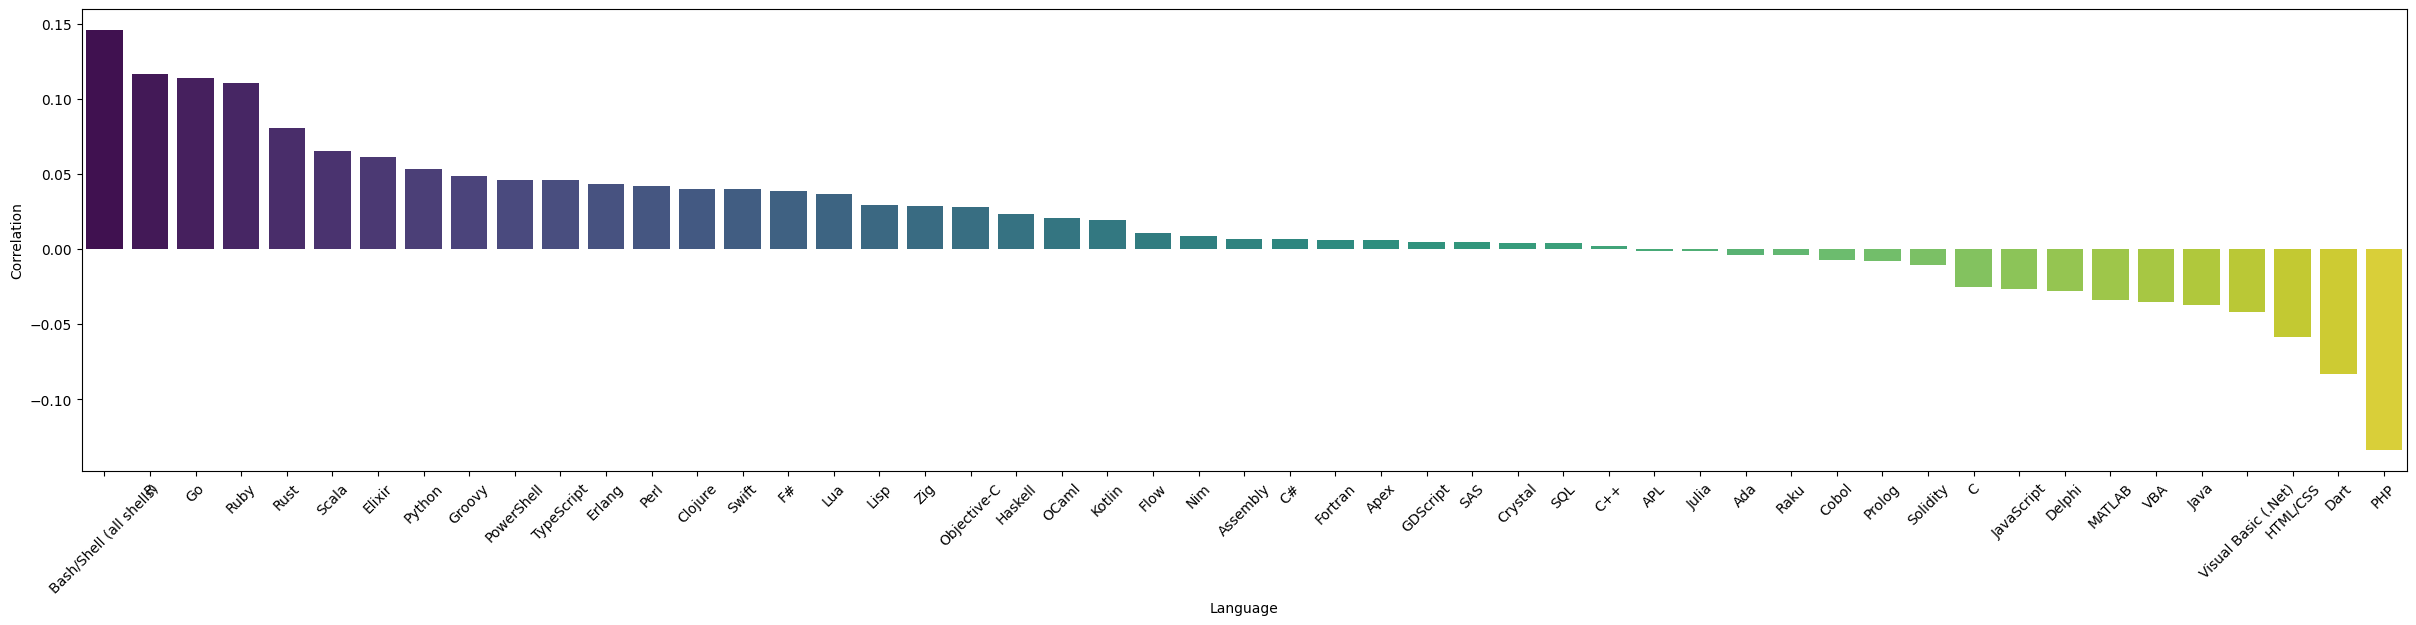

In [151]:
lang_correlations = {}
for lang in all_lang_types:
  lang_correlations[lang] = dataset_for_prediction[f"LanguageHaveWorkedWith{lang}"].corr(dataset_for_prediction["ConvertedCompYearly"])
sorted_lang_correlations = sorted(lang_correlations.items(), key=lambda x: x[1], reverse=True)
lang_corr_df = pd.DataFrame(sorted_lang_correlations, columns=["Language", "Correlation"])

plt.figure(figsize=(30, 6))
plt.xticks(rotation=45)
sns.barplot(data=lang_corr_df, x="Language", y="Correlation", palette="viridis")

In [152]:
lang_corr_df

,Language,Correlation
0,Bash/Shell (all shells),0.145802
1,R,0.116566
2,Go,0.113770
3,Ruby,0.110465
4,Rust,0.080765
5,Scala,0.065753
6,Elixir,0.061760
7,Python,0.053679
8,Groovy,0.048879
9,PowerShell,0.046314


<ipython-input-56-fbc1bea843c3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=lang_salary_df, x="Average Salary", y="Language", palette="viridis")


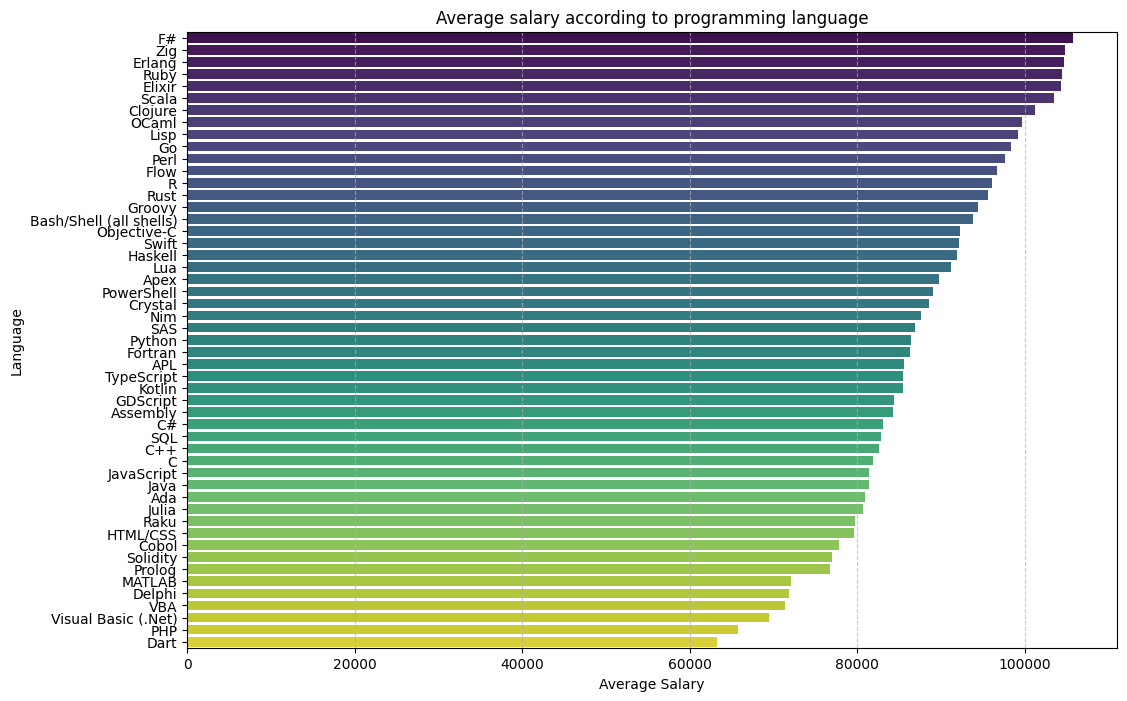

In [ ]:
lang_salaries = {}
for lang in all_lang_types:
  lang_salaries[lang] = dataset_for_prediction[dataset_for_prediction[f"LanguageHaveWorkedWith{lang}"] == 1]["ConvertedCompYearly"].mean()
sorted_lang_salaries = sorted(lang_salaries.items(), key=lambda x: x[1], reverse=True)
lang_salary_df = pd.DataFrame(sorted_lang_salaries, columns=["Language", "Average Salary"])

plt.figure(figsize=(12, 8))
sns.barplot(data=lang_salary_df, x="Average Salary", y="Language", palette="viridis")
plt.title("Average salary according to programming language")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-121-e29d923e2f69>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Language', y='AvgSalary', data=avg_salary_by_language_df, palette="viridis")


<Axes: xlabel='Language', ylabel='AvgSalary'>

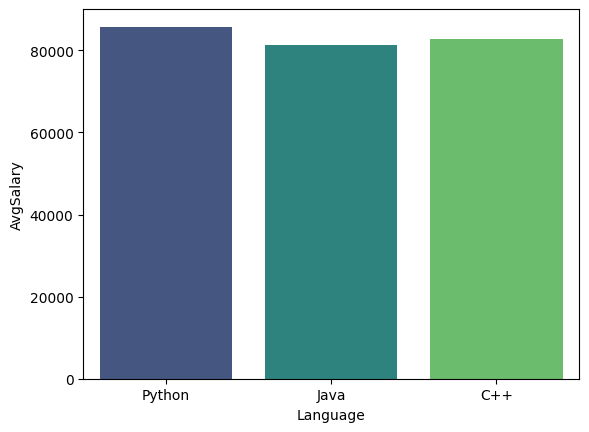

In [121]:
languages = ['Python', 'Java', 'C++']
language_columns = ["LanguageHaveWorkedWithC++", "LanguageHaveWorkedWithPython", "LanguageHaveWorkedWithJava"]
avg_salary_by_language = []
for language in languages:

    language_data = dataset_for_prediction[dataset_for_prediction[f'LanguageHaveWorkedWith{language}'] == 1]
    avg_salary = language_data['ConvertedCompYearly'].mean()
    avg_salary_by_language.append((language, avg_salary))
avg_salary_by_language_df = pd.DataFrame(avg_salary_by_language, columns=['Language', 'AvgSalary'])
avg_salary_by_language_df
sns.barplot(x='Language', y='AvgSalary', data=avg_salary_by_language_df, palette="viridis")


In [126]:
education_columns = [
    'EdLevel_Associate degree (A.A., A.S., etc.)',
    'EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
    'EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
    'EdLevel_Primary/elementary school',
    'EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
    'EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
    'EdLevel_Some college/university study without earning a degree',
    'EdLevel_Something else'
]


correlation_results = {}

for column in education_columns:

    correlation = dataset_for_prediction[column].corr(dataset_for_prediction['ConvertedCompYearly'])
    correlation_results[column] = correlation


for level, corr_value in correlation_results.items():
    print(f"Correlation between {level} and Salary: {corr_value}")

Correlation between EdLevel_Associate degree (A.A., A.S., etc.) and Salary: -0.0016606667291977513
Correlation between EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.) and Salary: 0.037849225473040815
Correlation between EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.) and Salary: 0.010293004965791894
Correlation between EdLevel_Primary/elementary school and Salary: -0.011228444007920859
Correlation between EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.) and Salary: 0.016152266781507517
Correlation between EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.) and Salary: -0.06697545774685967
Correlation between EdLevel_Some college/university study without earning a degree and Salary: -0.0252307005244966
Correlation between EdLevel_Something else and Salary: -0.03605304725217483


<ipython-input-57-77652935d9de>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_salary, palette="magma")


<Axes: title={'center': 'Salary dependency on type of education'}, xlabel='EdLevel', ylabel='ConvertedCompYearly'>

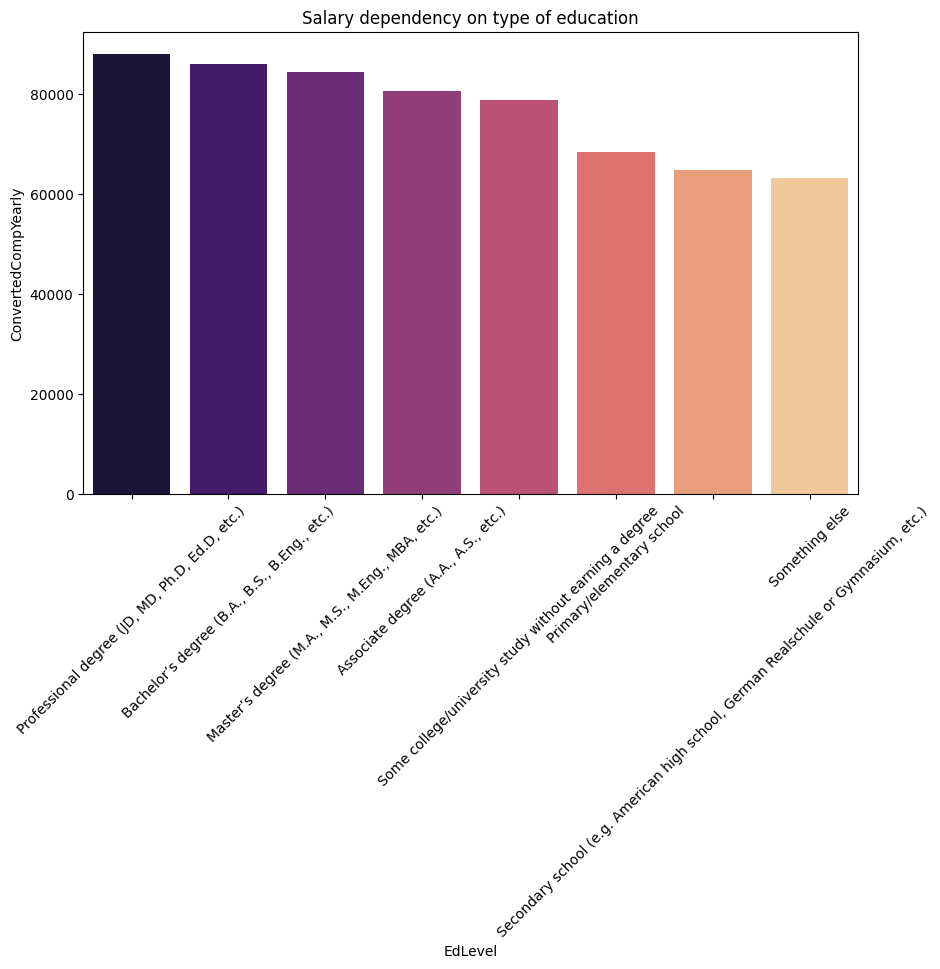

In [ ]:
edu_salary = dataset.groupby("EdLevel")["ConvertedCompYearly"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.title("Salary dependency on type of education")
plt.xticks(rotation=45)
sns.barplot(data=edu_salary, palette="magma")

In [127]:
dataset_for_prediction["WorkExp"].corr(dataset_for_prediction['ConvertedCompYearly'])

0.3460041580340338

<ipython-input-105-ba913a7739a6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=edu_salary, palette="magma")


<Axes: title={'center': 'Salary dependency on the work experiance'}, xlabel='WorkExp', ylabel='ConvertedCompYearly'>

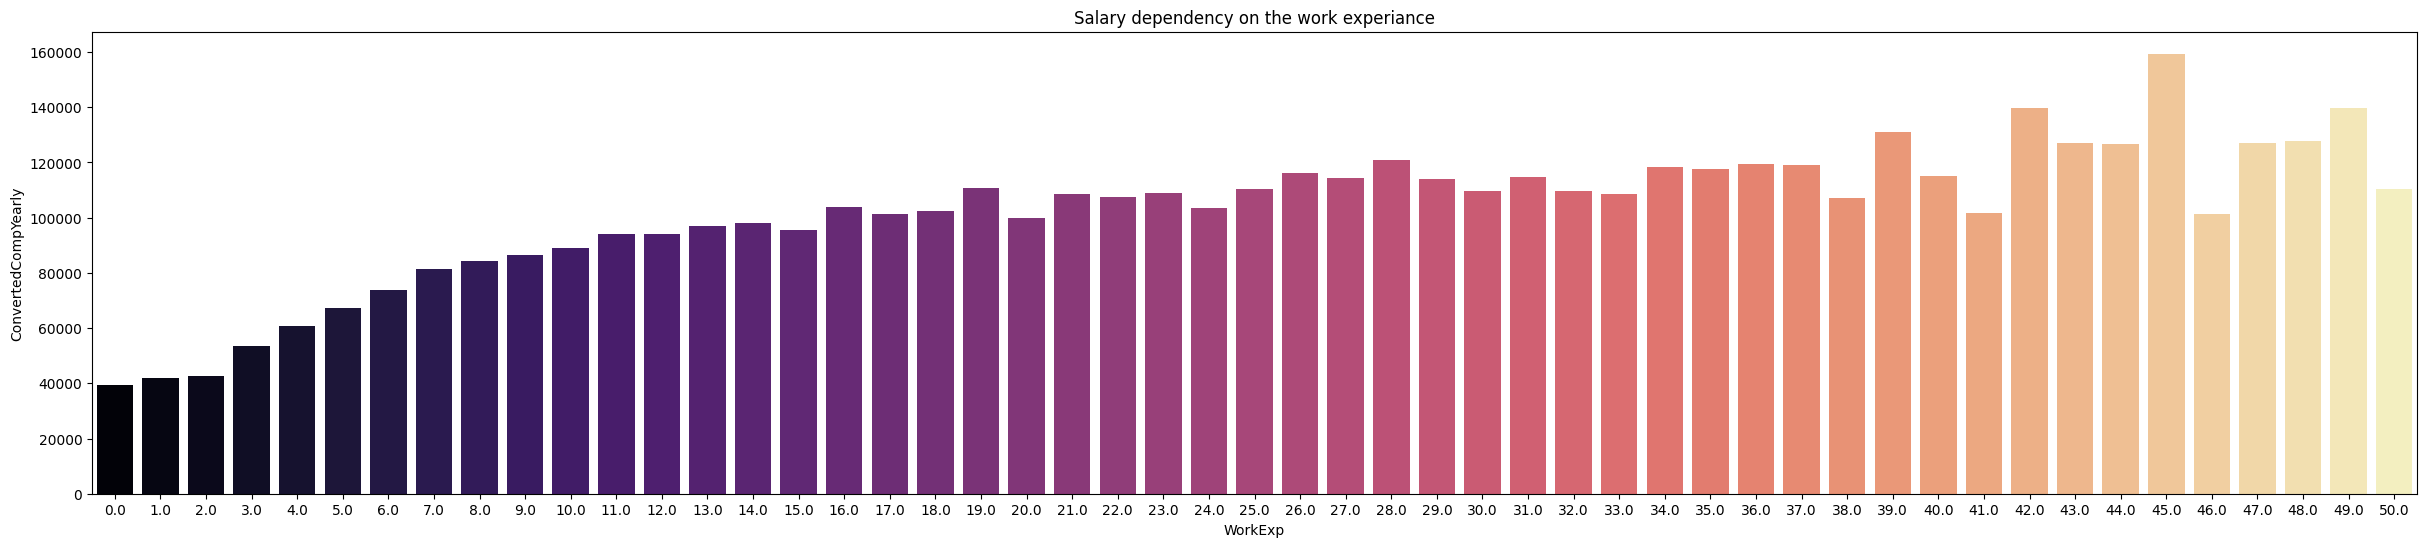

In [105]:
edu_salary = dataset.groupby("WorkExp")["ConvertedCompYearly"].mean().sort_values(ascending=False)

plt.figure(figsize=(30, 6))
plt.title("Salary dependency on the work experiance")
sns.barplot(data=edu_salary, palette="magma")

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.1, random_state=42)
clf.fit(X_train, y_train)

GradientBoostingRegressor(criterion='squared_error', random_state=42)

In [87]:
y_pred = clf.predict(X_test)

# Calculate and display RMSE
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Accuracy: {rmse:.4f}")
print(f"\nR2 score: {r2}")


Model Accuracy: 0.8928

R2 score: 0.453509247203401


In [88]:
y_pred_original_scale = np.power(y_pred, 2)
y_test_original_scale = np.power(y_test, 2)

mse_original_scale = mean_squared_error(y_test_original_scale, y_pred_original_scale)
r2_original_scale = r2_score(y_test_original_scale, y_pred_original_scale)

print(f'MSE (Original Scale): {mse_original_scale}')
print(f'R² (Original Scale): {r2_original_scale}')

MSE (Original Scale): 237.291747041159
R² (Original Scale): 0.5365823057770633
